# 전국 초등학교 학생 데이터
교육부에서 제공하는 2019년 사용

##  csv -> 2차원 리스트

In [1]:
import csv
import numpy as np
f = open('school_2019.csv','r',encoding = 'utf-8')
lines = csv.reader(f)  # csv파일을 한 줄씩 읽어 각 줄을 리스트 형태로 저장한다.
header = next(lines) # iterator 객체의 원소를 하나씩 읽어가는 함수 (파일을 한줄 씩 읽는다고 생각하면 됨)
first = next(lines)
print(header)
print(first)
f.close()

['지역', '학교명', '학급수', '학생수', '교사수']
['서울특별시 서초구', '서울교육대학교부설초등학교', '28', '616', '32']


In [2]:
f = open('school_2019.csv','r',encoding = 'utf-8')
lines = csv.reader(f)
header = next(lines)

list_data = []
for line in lines :
    list_data.append(line[:])
print(list_data)
f.close()

[['서울특별시 서초구', '서울교육대학교부설초등학교', '28', '616', '32'], ['서울특별시 종로구', '서울대학교사범대학부설초등학교', '31', '632', '35'], ['서울특별시 강남구', '서울개일초등학교', '31', '837', '38'], ['서울특별시 강남구', '서울구룡초등학교', '25', '492', '30'], ['서울특별시 강남구', '서울논현초등학교', '19', '339', '22'], ['서울특별시 강남구', '서울대곡초등학교', '44', '1226', '54'], ['서울특별시 강남구', '서울대도초등학교', '62', '2157', '73'], ['서울특별시 강남구', '서울대모초등학교', '32', '1084', '43'], ['서울특별시 강남구', '서울대왕초등학교', '39', '904', '48'], ['서울특별시 강남구', '서울대진초등학교', '17', '316', '23'], ['서울특별시 강남구', '서울대청초등학교', '13', '150', '17'], ['서울특별시 강남구', '서울대치초등학교', '46', '1567', '60'], ['서울특별시 강남구', '서울대현초등학교', '30', '675', '35'], ['서울특별시 강남구', '서울도곡초등학교', '38', '882', '49'], ['서울특별시 강남구', '서울도성초등학교', '56', '1740', '68'], ['서울특별시 서초구', '서울반원초등학교', '50', '1373', '59'], ['서울특별시 서초구', '서울반포초등학교', '38', '848', '45'], ['서울특별시 서초구', '서울방배초등학교', '42', '952', '48'], ['서울특별시 서초구', '서울방일초등학교', '34', '883', '39'], ['서울특별시 서초구', '서울방현초등학교', '16', '332', '19'], ['서울특별시 강남구', '서울봉은초등학교', '25', '585', '30'], ['서울특별시 강남구', '

## 2차원 리스트 -> 배열

In [3]:
f = open('school_2019.csv','r',encoding = 'utf-8')
lines = csv.reader(f)
header = next(lines)

list_data = []
for line in lines :
    list_data.append(line[:])

length = len(list_data)

data = np.zeros((length,3), dtype = 'int32')

for i in range(length):
    for j in range(3):
        data[i][j] = list_data[i][j+2]
print(data)
f.close()

[[ 28 616  32]
 [ 31 632  35]
 [ 31 837  38]
 ...
 [ 36 985  42]
 [ 34 862  41]
 [ 26 603  31]]


## 전국 최대 학생 수의 학교

In [4]:
f = open('school_2019.csv','r',encoding = 'utf-8')
lines = csv.reader(f)
header = next(lines)

list_data = []
for line in lines :
    list_data.append(line[:])

length = len(list_data)

data = np.zeros((length,3), dtype = 'int32')

for i in range(length):
    for j in range(3):
        data[i][j] = list_data[i][j+2]

max_index = np.argmax(data,axis = 0)
print(max_index)

max_class = list_data[max_index[0]][1]  # 최대 학급수를 가진 학교
num_class = list_data[max_index[0]][2]  # 최대 학급수의 값

max_student = list_data[max_index[1]][1] # 최대 학생수를 가진 학교
num_student = list_data[max_index[1]][3] # 최대 학생수의 값

max_teacher = list_data[max_index[2]][1] # 최대 교사수를 가진 학교
num_teacher = list_data[max_index[2]][4] # 최대 교사수의 값

print('최대 학급 수의 초등학교: %s / 학급 수: %d 명'%(max_class,int(num_class)))
print('최대 학생 수의 초등학교: %s / 학생 수: %d 명'%(max_student,int(num_student)))
print('최대 교사 수의 초등학교: %s / 교사 수: %d 명'%(max_teacher,int(num_teacher)))
f.close()

[ 138 1999  138]
최대 학급 수의 초등학교: 서울신정초등학교 / 학급 수: 75 명
최대 학생 수의 초등학교: 탄벌초등학교 / 학생 수: 2178 명
최대 교사 수의 초등학교: 서울신정초등학교 / 교사 수: 91 명


## 학생 수와 교사 수의 비교

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family = "Malgun Gothic")

f = open('school_2019.csv','r',encoding = 'utf-8')
lines = csv.reader(f)
header = next(lines)

schools = {}

for line in lines:
    if ('광주' in line[0]) and ('마재' in line[1]):
        schools.update({'마재':[line[2],line[3],line[4]]})
    if ('울산' in line[0]) and ('약사' in line[1]) :
        schools.update({'약사':[line[2], line[3], line[4]]})
    if ('용인' in line[0]) and ('정평' in line[1]) :
        schools.update({'정평':[line[2], line[3], line[4]]}) 
    if ('제주' in line[0]) and ('도평' in line[1]) :
        schools.update({'도평':[line[2], line[3], line[4]]})
        
print(schools)
f.close()

{'마재': ['24', '481', '28'], '약사': ['29', '685', '33'], '정평': ['36', '945', '43'], '도평': ['14', '300', '17']}


In [7]:
data = np.zeros((4,3), dtype = 'int32')

school = list(schools.values())

for i in range(len(schools)) :
    for j in range(3):
        data[i][j] = school[i][j]
print(data)
print(school)

np.array(school, dtype = 'int32')

[[ 24 481  28]
 [ 29 685  33]
 [ 36 945  43]
 [ 14 300  17]]
[['24', '481', '28'], ['29', '685', '33'], ['36', '945', '43'], ['14', '300', '17']]


array([[ 24, 481,  28],
       [ 29, 685,  33],
       [ 36, 945,  43],
       [ 14, 300,  17]])

In [8]:
data = np.insert(data, 2, 0, axis = 1)
data = np.insert(data, 4 ,0, axis = 1)
print(data)

row = data.shape[0]
for i in range(row):
    data[i][2] = round(data[i][1] / data[i][0])  # 학급 당 학생 수
    data[i][4] = round(data[i][1] / data[i][3])  # 교사 당 학생 수
    
print(data)

[[ 24 481   0  28   0]
 [ 29 685   0  33   0]
 [ 36 945   0  43   0]
 [ 14 300   0  17   0]]
[[ 24 481  20  28  17]
 [ 29 685  24  33  21]
 [ 36 945  26  43  22]
 [ 14 300  21  17  18]]


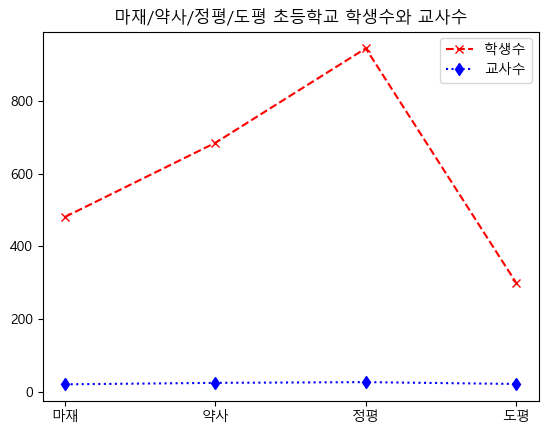

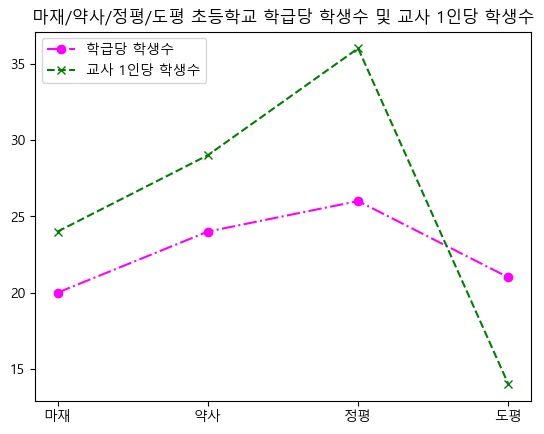

In [12]:
xdata = ['마재', '약사', '정평', '도평']
plt.plot(xdata, data[:, 1], label='학생수', color='red', linestyle='--', marker='x')
plt.plot(xdata, data[:, 3], label='교사수', color='blue', linestyle=':', marker='d')
plt.title('마재/약사/정평/도평 초등학교 학생수와 교사수')
plt.legend(loc='best')
plt.show()
# 여기까지 도표를 끝냄

# 새로운 도표
plt.plot(xdata, data[:, 2], label='학급당 학생수', color='magenta', linestyle='-.', marker='o')
plt.plot(xdata, data[:, 4], label='교사 1인당 학생수', color='green', linestyle='--', marker='x')
plt.title('마재/약사/정평/도평 초등학교 학급당 학생수 및 교사 1인당 학생수')
plt.legend(loc='best')
plt.show()

### 참고)pandas를 통해 데이터 프레임으로 만들기

In [9]:
import pandas as pd
f = open('school_2019.csv','r',encoding = 'utf-8')
lines = csv.reader(f)
header = next(lines)

list_data = []
for line in lines :
    list_data.append(line[:])
df= pd.DataFrame(list_data, columns = header)
print(df)
f.close()

               지역              학교명 학급수   학생수 교사수
0       서울특별시 서초구    서울교육대학교부설초등학교  28   616  32
1       서울특별시 종로구  서울대학교사범대학부설초등학교  31   632  35
2       서울특별시 강남구         서울개일초등학교  31   837  38
3       서울특별시 강남구         서울구룡초등학교  25   492  30
4       서울특별시 강남구         서울논현초등학교  19   339  22
...           ...              ...  ..   ...  ..
6259  제주특별자치도 제주시           월랑초등학교  30   777  35
6260  제주특별자치도 제주시           이도초등학교  43  1233  48
6261  제주특별자치도 제주시           도련초등학교  36   985  42
6262  제주특별자치도 제주시           삼화초등학교  34   862  41
6263  제주특별자치도 제주시          하귀일초등학교  26   603  31

[6264 rows x 5 columns]
